In [1]:
#loading a libraries requied for the analysis

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#import pandas_profiling
%matplotlib inline
from sklearn.impute import SimpleImputer
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler


In [2]:
# Linear regression with all features
#You now get the same result each time you run the function. This is because you’ve fixed the random number generator with random_state=4.
#shuffle is the Boolean object (True by default) that determines whether to shuffle the dataset before applying the split.


# Linear regression with all features

In [3]:
#loading a data
happy=pd.read_csv("world-happiness-report.csv")
#by using a path we can upload a file
#happy=pd.read_csv("C:/Users/prita/Project Analysis/world-happiness-report.csv") 
happy.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [4]:
happy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   year                              1949 non-null   int64  
 2   Life Ladder                       1949 non-null   float64
 3   Log GDP per capita                1913 non-null   float64
 4   Social support                    1936 non-null   float64
 5   Healthy life expectancy at birth  1894 non-null   float64
 6   Freedom to make life choices      1917 non-null   float64
 7   Generosity                        1860 non-null   float64
 8   Perceptions of corruption         1839 non-null   float64
 9   Positive affect                   1927 non-null   float64
 10  Negative affect                   1933 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 167.6+ KB


In [5]:
happy.shape

(1949, 11)

In [6]:
#to get a data upto year 2019
happy=happy.loc[happy.year<=2019,:]
happy.describe()
#to check any null value present or not
happy.isnull().sum()

Country name                          0
year                                  0
Life Ladder                           0
Log GDP per capita                   29
Social support                       13
Healthy life expectancy at birth     52
Freedom to make life choices         31
Generosity                           82
Perceptions of corruption           104
Positive affect                      21
Negative affect                      15
dtype: int64

In [7]:
#to remove the null values by using a simple imputer we want only the numeric data that's why we split a data.
x=happy.iloc[:,1:]
y=happy.iloc[:,0]
#removing a null values with the help of simple imputer
imputer = SimpleImputer(missing_values=np.nan, strategy='median') 
imputer = imputer.fit(x)
x= imputer.transform(x)

x=pd.DataFrame(x)
happy1=x
#to give the column names to the happy1 dataframe
happy1.columns =['year','Life Ladder','Log GDP per capita','Social support','Healthy life expectancy at birth',
                 'Freedom to make life choices','Generosity','Perceptions of corruption','Positive affect','Negative affect']

In [8]:
happy1.head()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,2008.0,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,2009.0,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,2010.0,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,2011.0,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,2012.0,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268


In [9]:
happy.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,1854.000000,1854.000000,1825.000000,1841.000000,1802.000000,1823.000000,1772.000000,1750.000000,1833.000000,1839.000000
mean,2012.868393,5.447547,9.349991,0.811192,63.168421,0.738680,0.000506,0.749127,0.709469,0.267333
std,3.971423,1.119157,1.160011,0.118973,7.537238,0.142979,0.163387,0.185974,0.108122,0.085273
min,2005.000000,2.375000,6.635000,0.290000,32.300000,0.258000,-0.335000,0.035000,0.322000,0.083000
25%,2010.000000,4.624250,8.445000,0.748000,58.305000,0.643000,-0.113250,0.693000,0.623000,0.206000
50%,2013.000000,5.365500,9.449000,0.834000,65.090000,0.758000,-0.025000,0.804000,0.721000,0.256000
75%,2016.000000,6.271250,10.335000,0.905000,68.395000,0.852500,0.091000,0.874000,0.801000,0.318000
max,2019.000000,8.019000,11.648000,0.987000,77.100000,0.985000,0.698000,0.983000,0.944000,0.705000


In [10]:
happy1.describe()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000,1854.000000
mean,2012.868393,5.447547,9.351539,0.811352,63.222316,0.739003,-0.000622,0.752206,0.709599,0.267242
std,3.971423,1.119157,1.150963,0.118570,7.437502,0.141800,0.159817,0.181120,0.107515,0.084933
min,2005.000000,2.375000,6.635000,0.290000,32.300000,0.258000,-0.335000,0.035000,0.322000,0.083000
25%,2010.000000,4.624250,8.454750,0.750000,58.700000,0.645000,-0.106000,0.700250,0.625000,0.206000
50%,2013.000000,5.365500,9.449000,0.834000,65.090000,0.758000,-0.025000,0.804000,0.721000,0.256000
75%,2016.000000,6.271250,10.314750,0.904000,68.215000,0.850000,0.085000,0.868000,0.799000,0.317000
max,2019.000000,8.019000,11.648000,0.987000,77.100000,0.985000,0.698000,0.983000,0.944000,0.705000


In [11]:
happy1.isnull().sum()

year                                0
Life Ladder                         0
Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Perceptions of corruption           0
Positive affect                     0
Negative affect                     0
dtype: int64

In [12]:
happy1= happy1.drop(columns = ['year']) #dropping a column which are not require
y = np.array(happy1['Life Ladder']).reshape(-1,1) #dependent variable i.e. we have to predict life ladder score
X=happy1.iloc[:,2:]#independents variables i.e variables from which we predict a life ladder score
# Feature Scaling 
sc_X = StandardScaler() 
sc_y = StandardScaler() 
X = sc_X.fit_transform(X) 
y = sc_y.fit_transform(y)
#splitting a data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101, shuffle = False) 
#print(X_train)
#applying a linear regression model
lm = LinearRegression()
#fitting a model on train data
lm.fit(X_train,y_train)
#to see the regression coefficients
print('Coefficients: \n', lm.coef_)
#predicted value of X_test data 
predictions = lm.predict(X_test)
#to find the root mean square error to find the model is fit or not.
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print("The R^2 score is: ", metrics.r2_score(y_test,predictions))

Coefficients: 
 [[ 0.32488054  0.41627323  0.0427359   0.06933588 -0.11614603  0.16621955
   0.00746243]]
MAE: 0.4573718483991971
MSE: 0.35564965028474654
RMSE: 0.5963636896095759
The R^2 score is:  0.7007621852915417


From above output we have that RMSE for this model is 0.5949 which is large so for the further process we have to eliminates number of features to see the accuracy of the model. To eliminate features we use the heatmap and once again we can apply a linear regression.

Index(['Life Ladder', 'Log GDP per capita', 'Social support',
       'Healthy life expectancy at birth', 'Freedom to make life choices',
       'Generosity', 'Perceptions of corruption', 'Positive affect',
       'Negative affect'],
      dtype='object')


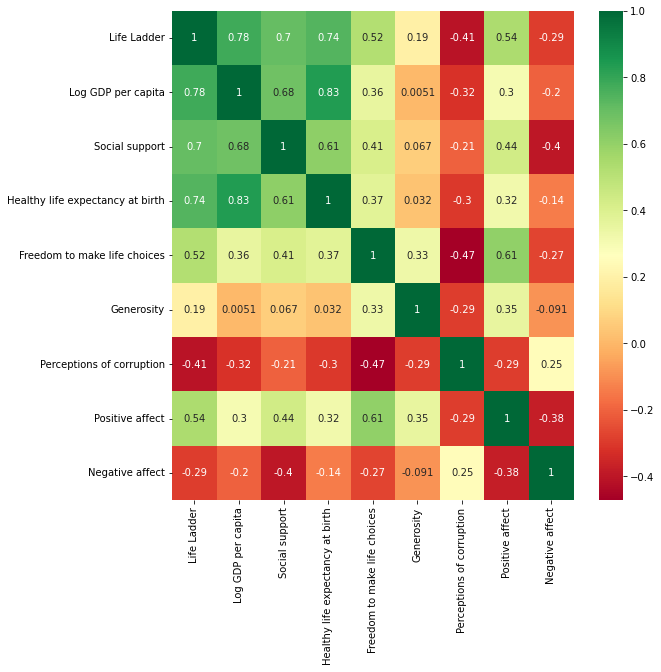

In [13]:
#get correlations of each features in dataset
corrmat = happy1.corr()
#print(corrmat)
top_corr_features = corrmat.index
print(top_corr_features)
#print(top_corr_features)
plt.figure(figsize=(9,9))
#plot heat map
g=sns.heatmap(happy1[top_corr_features].corr(),annot=True,cmap="RdYlGn")

From the above heatmap we have life ladder is highly correlated with a 'Log GDP per capita','Social support','Healthy life expectancy at birth','Freedom to make life choices','Positive affect','Perceptions of corruption' and less correlated with a 'Generosity','Negative affect'. So for the further process we use only those features which are highly correlatd with a life ladder score.

# Linear regression with highly correlated features but with a inclusion of 'Perceptions of corruption'

Coefficients: 
 [0.36888819 1.77626243 0.02622978 0.66414793 2.38262788]
MAE: 0.44096429260725906
MSE: 0.35293819408389665
RMSE: 0.5940860157282754
The R^2 score is:  0.762783602049379


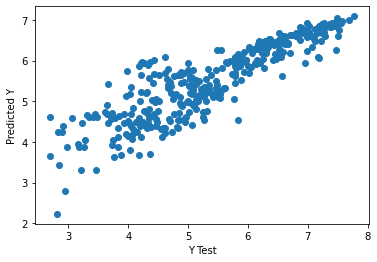

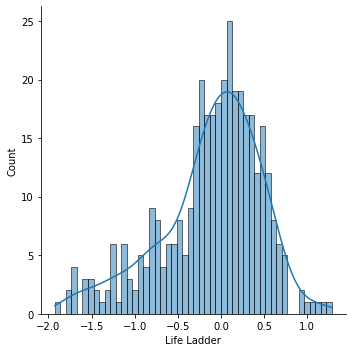

In [14]:
happy1= happy1.drop(columns = ['Generosity','Perceptions of corruption','Negative affect'])

y = happy1['Life Ladder']

X = happy1.drop(columns = ['Life Ladder'])



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101, shuffle = False)
lm = LinearRegression()
lm.fit(X_train,y_train)
print('Coefficients: \n', lm.coef_)
predictions = lm.predict(X_test)

plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print("The R^2 score is: ", metrics.r2_score(y_test,predictions))
sns.displot((y_test-predictions),bins=50, kde = True);

Here we get a very large RMSE that's why now we go for the Linear regression with highly correlated features but without a inclusion of 'Perceptions of corruption'

# Linear regression with highly correlated features 

In [15]:
happy=pd.read_csv("world-happiness-report.csv")
happy=happy.loc[happy.year<=2019,:]
happy.head()
happy.describe()
happy.isnull().sum()
x=happy.iloc[:,1:]
y=happy.iloc[:,0]
imputer = SimpleImputer(missing_values=np.nan, strategy='median') 
imputer = imputer.fit(x)
x= imputer.transform(x)
x=pd.DataFrame(x)
happy1=x
happy1.head()
happy1.columns =['year','Life Ladder','Log GDP per capita','Social support','Healthy life expectancy at birth',
                 'Freedom to make life choices','Generosity','Perceptions of corruption','Positive affect','Negative affect']
happy1.head()
happy1.isnull().sum()
happy1= happy1.drop(columns = ['year'])
happy1= happy1.drop(columns = ['Generosity','Negative affect'])
y = np.array(happy1['Life Ladder']).reshape(-1,1)
X=happy1.iloc[:,1:]
# Feature Scaling 
sc_X = StandardScaler() 
sc_y = StandardScaler() 
X = sc_X.fit_transform(X) 
y = sc_y.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101, shuffle = False)
#Scaling numeric features using sklearn StandardScalar

lm = LinearRegression()
lm.fit(X_train,y_train)
print('Coefficients: \n', lm.coef_)
predictions = lm.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print("The R^2 score is: ", metrics.r2_score(y_test,predictions))


Coefficients: 
 [[ 0.34864683  0.20831247  0.17516457  0.04103833 -0.10150848  0.225727  ]]
MAE: 0.3822093198742215
MSE: 0.2754350224285944
RMSE: 0.5248190377916891
The R^2 score is:  0.7682534647799631


From above model we get the lowest RMSE so now we can use the linear egression with highly correlated features but without a inclusion of 'Perceptions of corruption'

# Fitting a model on the 2020 data:

In [16]:
happy=pd.read_csv("world-happiness-report.csv")
happy=happy.loc[happy.year>2019,:]
happy.head()
happy.describe()
happy.isnull().sum()
x=happy.iloc[:,1:]
y=happy.iloc[:,0]
imputer = SimpleImputer(missing_values=np.nan, strategy='median') 
imputer = imputer.fit(x)
x= imputer.transform(x)
x=pd.DataFrame(x)
happy1=x
happy1.head()
happy1.columns =['year','Life Ladder','Log GDP per capita','Social support','Healthy life expectancy at birth','Freedom to make life choices','Generosity','Perceptions of corruption','Positive affect','Negative affect']
#happy1['country']=y
happy1.head()
happy1.isnull().sum()
happy1= happy1.drop(columns = ['year'])
happy1= happy1.drop(columns = ['Generosity','Negative affect'])

y = np.array(happy1['Life Ladder']).reshape(-1,1)
X=happy1.iloc[:,1:]
# Feature Scaling 
sc_X = StandardScaler() 
sc_y = StandardScaler() 
X = sc_X.fit_transform(X) 
y = sc_y.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=101, shuffle = False)
lm = LinearRegression()
lm.fit(X_train,y_train)
print('Coefficients: \n', lm.coef_)
predictions = lm.predict(X_test)

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print("The R^2 score is: ", metrics.r2_score(y_test,predictions))


Coefficients: 
 [[ 0.39406741  0.32092498  0.04388557  0.13412246 -0.14419469  0.03931313]]
MAE: 0.35721444260246754
MSE: 0.2546301870775622
RMSE: 0.5046089447062568
The R^2 score is:  0.8285149039464726


# To see the predicted value for a particular country :

In [17]:
happy=pd.read_csv("world-happiness-report.csv")

x=happy.iloc[:,1:]
y=happy.iloc[:,0]

imputer = SimpleImputer(missing_values=np.nan, strategy='median') 
imputer = imputer.fit(x)
x= imputer.transform(x)
x=pd.DataFrame(x)
happy1=x
happy1.head()

happy1.columns =['year','Life Ladder','Log GDP per capita','Social support','Healthy life expectancy at birth','Freedom to make life choices','Generosity','Perceptions of corruption','Positive affect','Negative affect']
happy1['country']=y
happy1.head()

happy1=happy1.loc[happy1.year>2019,:]
happy1.head()

#happy1= happy1.drop(columns = ['year','country'])

happy1= happy1.drop(columns = ['Generosity','Negative affect'])



happy1=happy1.loc[happy1.country=='India',:]
happy1.head()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Perceptions of corruption,Positive affect,country
746,2020.0,4.225,8.703,0.617,60.9,0.906,0.78,0.752,India


In [18]:
predict= (happy1['Log GDP per capita']*0.42261784 )+( happy1['Social support']*2.96789886)+( happy1['Healthy life expectancy at birth'] * 0.00841774)+(happy1['Freedom to make life choices']*1.33668067)-(happy1['Perceptions of corruption']*0.6699757) +(happy1['Positive affect']*0.47664503)

predict

746    7.068766
dtype: float64

In [19]:
happy=pd.read_csv("world-happiness-report.csv")

x=happy.iloc[:,1:]
y=happy.iloc[:,0]

imputer = SimpleImputer(missing_values=np.nan, strategy='mean') 
imputer = imputer.fit(x)
x= imputer.transform(x)
x=pd.DataFrame(x)
happy1=x
happy1.head()

happy1.columns =['year','Life Ladder','Log GDP per capita','Social support','Healthy life expectancy at birth','Freedom to make life choices','Generosity','Perceptions of corruption','Positive affect','Negative affect']
happy1['country']=y
happy1.head()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,country
0,2008.0,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258,Afghanistan
1,2009.0,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237,Afghanistan
2,2010.0,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275,Afghanistan
3,2011.0,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267,Afghanistan
4,2012.0,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268,Afghanistan


In [20]:
happy1.to_csv("wh2020.csv", sep=',')